# LeNet for Traffic Sign V3
![LeNet Architecture](lenet.png)
Modified from source: Yan LeCun

Author: Peng "Patrick" Su
Testing hist_eq

Since augmentation does not help at all, V3 is used as submitted version

## Load Data

Load the traffic sign data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
%matplotlib inline

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../traffic-signs-data/train.p'
validation_file = '../traffic-signs-data/valid.p'
testing_file = '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

The traffic sign data comes as 32x32x3 images, and LeNet accepts 32x32xC images. No need to pad anything. 

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [3]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [4]:
def normalize(img):
    return (img - 128.)/128.
def hist_eq(img):
    if (len(img.shape)>3): # if you're passing in a collection of images
        num_images = img.shape[0]
        image_shape = img.shape[1:]
        locEqImg = np.zeros([num_images,image_shape[0],image_shape[1],image_shape[2]])
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6))
        for i in range(num_images):
            #print("currImg dtype is ", img[i].dtype)
            #img[i] =img[i].astype(np.float32)
            currImg = img[i].squeeze()
            #img_yuv = cv2.cvtColor(currImg, cv2.COLOR_RGB2YUV)
            #img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
            #tmp = cv2.cvtColor(img_yuv, cv 2.COLOR_YUV2RGB)
            #eqImg[i]=tmp
            
            img_lab = cv2.cvtColor(currImg, cv2.COLOR_RGB2LAB)
            img_lab[:,:,0]=clahe.apply(img_lab[:,:,0])
            tmp = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)
            locEqImg[i] = tmp
    else:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(6,6))
        img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        img_lab[:,:,0]=clahe.apply(img_lab[:,:,0])
        tmp = cv2.cvtColor(img_lab, cv2.COLOR_LAB2RGB)
        locEqImg = tmp
    return locEqImg

X_train = hist_eq(X_train)
X_train = normalize(X_train)
X_train = X_train.astype('float32')

X_valid = hist_eq(X_valid)
X_valid = normalize(X_valid)
X_valid = X_valid.astype('float32')

X_test = hist_eq(X_test)
X_test = normalize(X_test)
X_test = X_test.astype('float32')

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
X_train.dtype

dtype('float32')

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5,5,3,6], mu, sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5,5,6,16], mu, sigma)),
        'wf3': tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma)),
        'wf4': tf.Variable(tf.truncated_normal([120, 84], mu, sigma)),
        'wf5': tf.Variable(tf.truncated_normal([84, 43], mu, sigma))}
    biases = {
        'bc1': tf.zeros([6]),
        'bc2': tf.zeros([16]),
        'bf3': tf.zeros([120]),
        'bf4': tf.zeros([84]),
        'bf5': tf.zeros([43]),
    }
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides = [1, 1, 1, 1], padding = 'VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)
#     flat1 = flatten(conv1, [-1, 14*14*6])
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides = [1, 1, 1, 1], padding = 'VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    # TODO: Flatten. Input = 5x5x8. Output = 200.

#     flat2 = flatten(conv2, [-1, 5*5*16])
#     flat = tf.concat(1, [flat1, flat2])
    
    flat = flatten(conv2, [-1, 5*5*16])
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3 = tf.add(tf.matmul(flat, weights['wf3']), biases['bf3'])
    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4 = tf.add(tf.matmul(fc3, weights['wf4']), biases['bf4'])
    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc4, weights['wf5']), biases['bf5'])
    
    return logits

## Features and Labels
Train LeNet to classify traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [11]:
rate = 0.001
logits = LeNet(x)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [12]:
saver = tf.train.Saver(max_to_keep=100)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [13]:
import shutil
save_dir = 'LeNetV3'
out_dir = out_dir = os.path.abspath(os.path.join(os.path.curdir, "../Traffic-Sign-Classifier-runs", save_dir))

train_summary_dir = os.path.join(out_dir, "train")        
valid_summary_dir = os.path.join(out_dir, "valid")
checkpoint_dir = os.path.join(out_dir, "checkpoints")

checkpoint_prefix = os.path.join(checkpoint_dir,"model")
checkpoint_every = 100
train_summary_every = 100
valid_summary_every = 100

EPOCHS = 20
BATCH_SIZE = 128

In [15]:
if os.path.exists(out_dir):
    shutil.rmtree(out_dir)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    global_step = 0
    train_summary_writer = tf.summary.FileWriter(train_summary_dir, sess.graph)
    valid_summary_writer = tf.summary.FileWriter(valid_summary_dir, sess.graph)
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            global_step += 1
            if global_step % train_summary_every == 0:
                train_loss, train_accuracy = evaluate(batch_x, batch_y)
                train_summaries = tf.Summary()
                train_summaries.value.add(tag='Train Loss', simple_value=train_loss)
                train_summaries.value.add(tag='Train Accuracy', simple_value=train_accuracy)
                train_summary_writer.add_summary(train_summaries, global_step)
                print("Batch {} Train Loss: {:.3f} Train Accuracy: {:.3f}".format(global_step, train_loss, train_accuracy))
                print()
            if global_step % valid_summary_every == 0:
                validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
                valid_summaries = tf.Summary()
                valid_summaries.value.add(tag='Validation Loss', simple_value=validation_loss)
                valid_summaries.value.add(tag='Validation Accuracy', simple_value=validation_accuracy)
                print("valid writing")
                valid_summary_writer.add_summary(valid_summaries, global_step)
                print("EPOCH {} Batch {} ...".format(i+1, global_step))
                print("Validation loss = {:.3f}".format(validation_loss))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
            if global_step % checkpoint_every == 0:
                saver.save(sess, checkpoint_prefix, global_step=global_step)            
    print("Training Done")

Training...

Batch 100 Train Loss: 1.119 Train Accuracy: 0.656

valid writing
EPOCH 1 Batch 100 ...
Validation loss = 1.197
Validation Accuracy = 0.639

Batch 200 Train Loss: 0.420 Train Accuracy: 0.859

valid writing
EPOCH 1 Batch 200 ...
Validation loss = 0.565
Validation Accuracy = 0.832

Batch 300 Train Loss: 0.259 Train Accuracy: 0.922

valid writing
EPOCH 2 Batch 300 ...
Validation loss = 0.384
Validation Accuracy = 0.888

Batch 400 Train Loss: 0.264 Train Accuracy: 0.945

valid writing
EPOCH 2 Batch 400 ...
Validation loss = 0.376
Validation Accuracy = 0.885

Batch 500 Train Loss: 0.175 Train Accuracy: 0.953

valid writing
EPOCH 2 Batch 500 ...
Validation loss = 0.308
Validation Accuracy = 0.907

Batch 600 Train Loss: 0.186 Train Accuracy: 0.945

valid writing
EPOCH 3 Batch 600 ...
Validation loss = 0.268
Validation Accuracy = 0.923

Batch 700 Train Loss: 0.068 Train Accuracy: 1.000

valid writing
EPOCH 3 Batch 700 ...
Validation loss = 0.250
Validation Accuracy = 0.920

Batch 8

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir))
    train_loss, train_accuracy = evaluate(X_train, y_train)
    print("Train Loss = {:.3f}".format(train_loss))
    print("Train Accuracy = {:.3f}".format(train_accuracy))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir))
    valid_loss, valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Loss = {:.3f}".format(valid_loss))
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir))
    test_loss, test_accuracy = evaluate(X_test, y_test)
    print("Test Loss = {:.3f}".format(test_loss))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train Loss = 0.007
Train Accuracy = 0.999
Valid Loss = 0.152
Valid Accuracy = 0.967
Test Loss = 0.175
Test Accuracy = 0.956


In [17]:
X_valid.shape

(4410, 32, 32, 3)

In [18]:
def corr_predict(X_data, y_data):
    num_examples = len(X_data)
    corr_predict = np.zeros(num_examples)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        temp = np.array(sess.run([correct_prediction], feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})).astype('Int32')
        corr_predict[offset:offset+BATCH_SIZE] = temp
    return corr_predict

In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(checkpoint_dir))
    corr_pred = corr_predict(X_valid,y_valid)

145


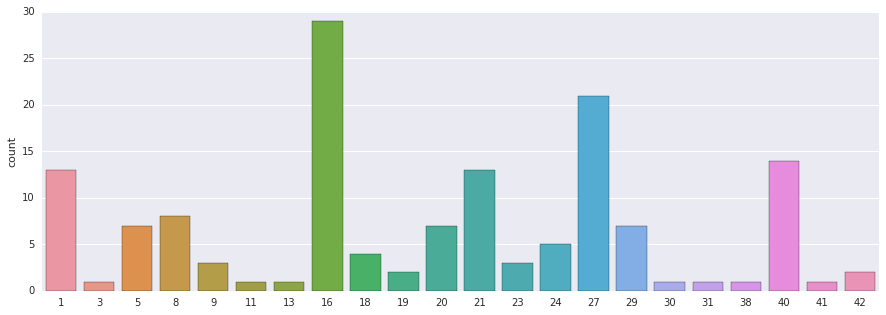

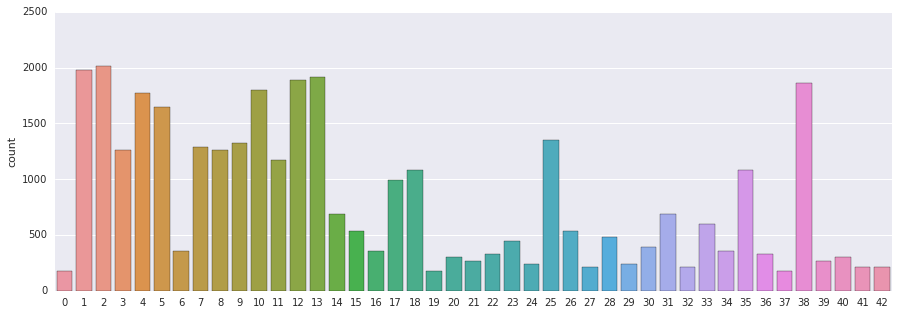

In [20]:
import seaborn as sns
print(np.sum(corr_pred == 0))
wrong_pred_indexes = np.argwhere(corr_pred == 0)
plt.figure(figsize = (15,5))
sns.countplot(y_valid[corr_pred == 0])
plt.figure(figsize = (15,5))
sns.countplot(y_train)

In [ ]:
## Let me augment the undersampled data and see what happens